In [1]:
import pandas as pd
import numpy as np


In [6]:
data = pd.read_csv('diabetes.csv')

In [7]:
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [11]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['Outcome'] = data['Outcome']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

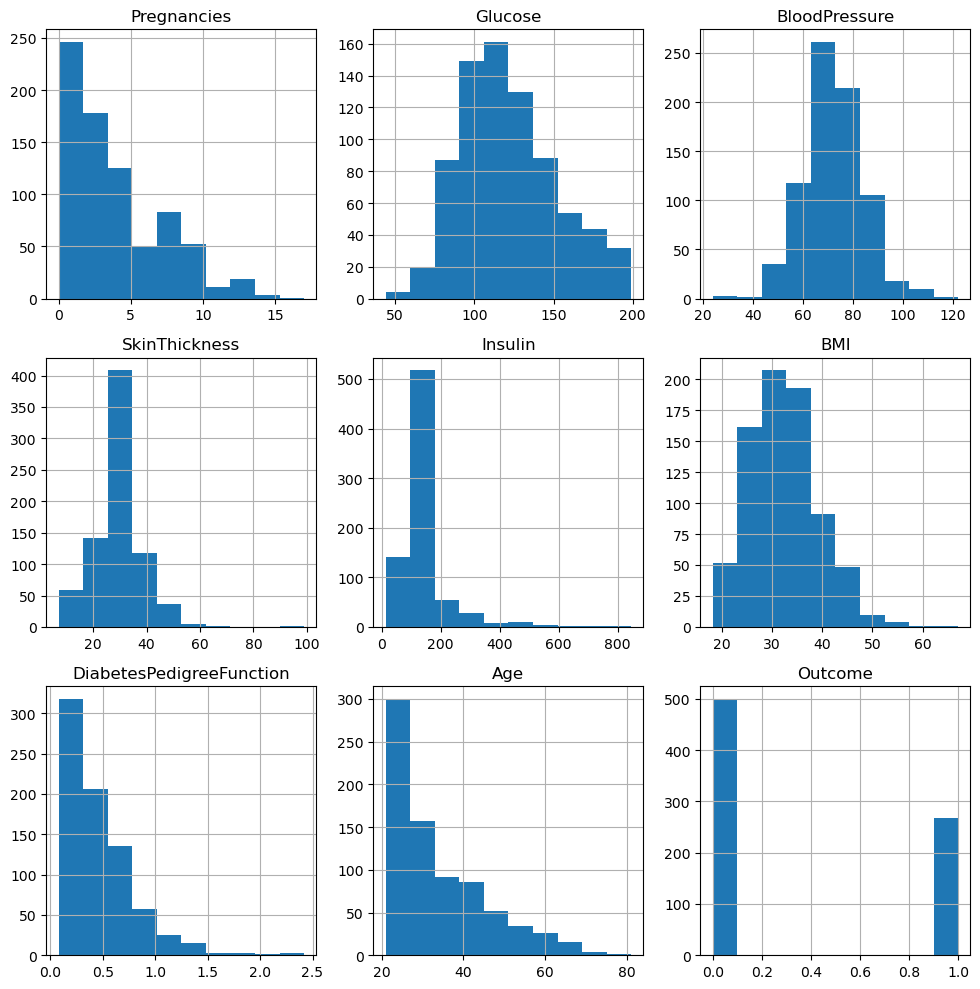

In [15]:
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


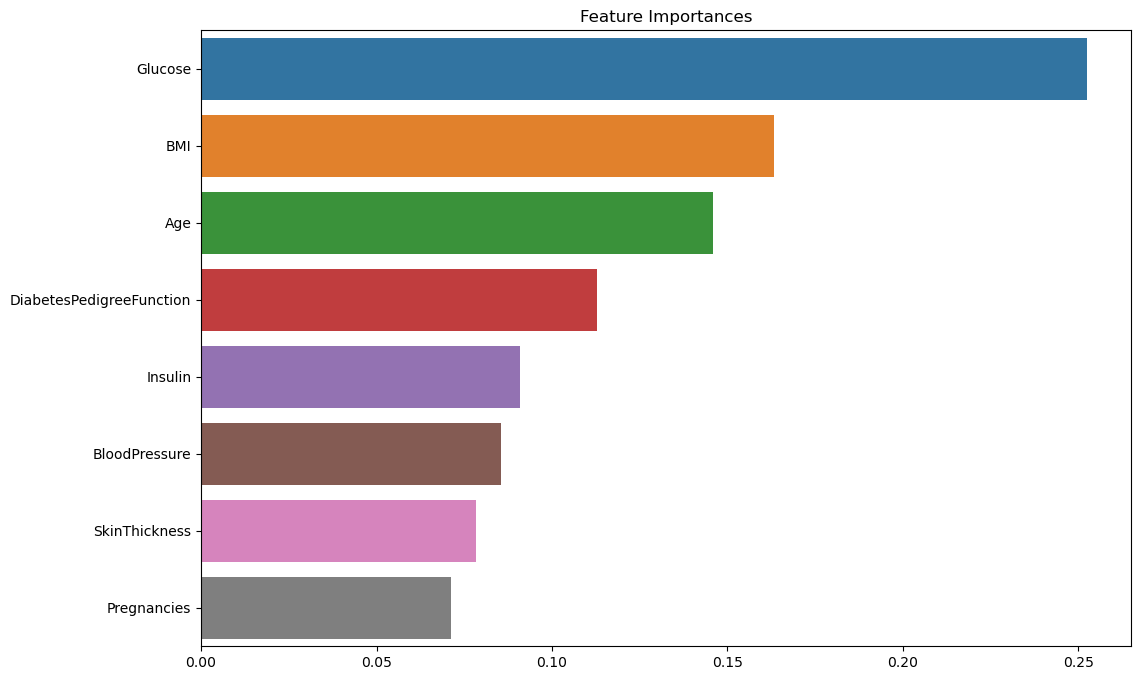

In [31]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.show()

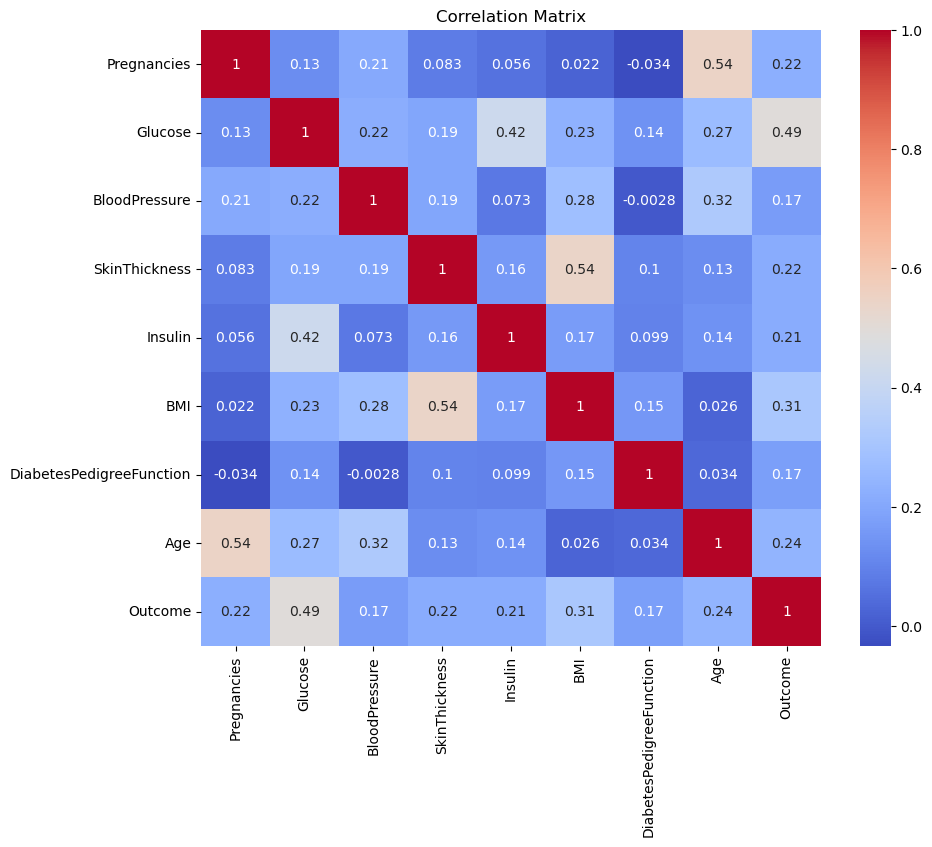

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

MODEL TRAINING


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [18]:
X = data_scaled.drop('Outcome', axis=1)
y = data_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)


EVALUATION

In [24]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7402597402597403


In [23]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7445887445887446


In [25]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [26]:
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [27]:
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
rf_auc = roc_auc_score(y_test, y_pred_rf)

In [28]:
print("Logistic Regression AUC:", logreg_auc)

Logistic Regression AUC: 0.7043460264900662


In [29]:
print("Random Forest AUC:", rf_auc)

Random Forest AUC: 0.7252897350993377
